<p style="text-align:center;"><span style="font-size:48px;"><span style="color:navy;"><span style="font-family:cursive;"> Rice Image CNN Project with Pytorch </span> </span>  </span></p>

# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents 💻</p>

<div style='border: 3px solid none; background-color: #f2f2f2; font-family: Times New Roman; font-size: 110%; padding: 10px'>

* **[1. A Brief Explanation](#1)**

  - What is the project about?
    
  - Importance of this topic
   
   
* **[2. About this project](#2)**

  - Why we have used this method?
    
  - Recommended usage of the method?
    
    
    
* **[3. Import Libraries](#3)**

  - Key libraries used in this project
  
  
* **[4. Import Dataset](#4)**  

   - Importing the dataset 
   
   
   
* **[5. Data Augmentation and Visualisation](#4)**

   - Techniques applied to enhance the dataset
    
    
    
* **[6. Modeling](#6)**

   - Applying Convolutional Neural Networks (CNN) using Pytorch
    
    
    
* **[7. Training the Model](#7)**

   - Training process and parameters used
    
    
* **[8. Evaluating Results](#8)**

   - Analyzing the model outcomes to select the best one

<a id="1"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">A Brief Explanation </p>

<div style='border: 3px solid none; background-color: #f2f2f2; padding: 10px'>


* **1. What is the project about?**

  - This project focuses on building and training a Convolutional Neural Network (CNN) using PyTorch to classify images into different categories. The dataset consists of images of rice grains, categorized into five classes: Arborio, Basmati, Ipsala, Jasmine, and Karacadag. The goal of the project is to develop an accurate image classification model capable of distinguishing between these rice types based on visual features.
   
    
    
* **2. Importance of this topic**
    
  - Image classification is a fundamental task in computer vision with broad applications, including quality control in agriculture, automated sorting of products, and enhancing supply chain efficiency. By utilizing CNNs, which are adept at learning spatial hierarchies and patterns from images, this project aims to improve the accuracy and efficiency of rice grain classification. PyTorch, known for its dynamic computation graph and flexible deep learning framework, is employed to implement and fine-tune the model, offering an efficient and effective solution to the classification problem. This approach not only demonstrates the practical use of deep learning techniques in real-world applications but also contributes to advancements in automated image analysis and agricultural technology.

</div>

<a id="2"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About this project </p>

<div style='border: 3px solid none; background-color: #f2f2f2; padding: 10px'>

* **1. Why we have used this method?**

  - Convolutional Neural Networks (CNNs) are highly effective for image classification tasks due to their ability to automatically learn and extract spatial features from images. CNNs leverage convolutional layers to detect patterns, edges, and textures at various levels of abstraction. This characteristic makes CNNs particularly suitable for tasks like classifying rice grain images, where distinguishing subtle differences in texture and structure is crucial.
   
   
* **2. Recommended usage of the method?**
    
  - The CNN model implemented using PyTorch is recommended for this task because PyTorch provides flexible and efficient tools for building and training deep learning models. With its dynamic computation graph and extensive support for advanced neural network architectures, PyTorch allows for precise control over the training process and facilitates high accuracy in image classification tasks. PyTorch's ecosystem also includes powerful libraries and tools for data augmentation, model evaluation, and performance optimization, making it a robust choice for image classification problems.
  

</div>


<a id="3"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries </p>

In [2]:
# Import some tools from PyTorch to help with images
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

<a id="4"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Dataset and Data Augmentation</p>

<div style='border: 3px solid none; background-color: #f2f2f2; padding: 10px'>
    
* **Importing the dataset**

- The dataset is divided into training, validation, and test sets. Each set contains images categorized into five classes: Arborio, Basmati, Ipsala, Jasmine, and Karacadag. The dataset is loaded using PyTorch’s data loaders.
    
* **Data Augmentation**
    
- To enhance the training data and improve model robustness, various augmentation techniques are applied to the training set. These techniques include resizing images to 256x256 pixels, applying random rotations up to 20 degrees, flipping images horizontally, and performing random crops and resizes. Additionally, images are subject to random affine transformations to shear them slightly and undergo color adjustments to alter brightness, contrast, saturation, and hue. The final augmentation steps convert images to tensors and normalize them with standard mean and standard deviation values for better training performance.
</div>

In [3]:
# Define the rules for changing (augmenting) our training images
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  # Make all images 256x256 pixels
    transforms.RandomRotation(20),  # Randomly rotate images by 20 degrees
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomResizedCrop(256),  # Randomly crop and resize images
    transforms.RandomAffine(degrees=0, shear=0.2),  # Randomly shear images
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally again
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Randomly change colors
    transforms.ToTensor(),  # Change images to tensors (big lists of numbers)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize colors
])

In [4]:
# Define simpler rules for changing validation and test images
val_test_transforms = transforms.Compose([
    transforms.Resize((256, 256)),  # Make all images 256x256 pixels
    transforms.ToTensor(),  # Change images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize colors
])


In [5]:
#Define the data pathes

train_dir = '/kaggle/input/rice-images-cnn-datasets/Rise_CNN_Project_split/train/'
val_dir = '/kaggle/input/rice-images-cnn-datasets/Rise_CNN_Project_split/val/'
test_dir = '/kaggle/input/rice-images-cnn-datasets/Rise_CNN_Project_split/test'

In [6]:
# Load the images from the folders and apply the transformation rules
train_dataset = ImageFolder(train_dir, transform=train_transforms)
val_dataset = ImageFolder(val_dir, transform=val_test_transforms)
test_dataset = ImageFolder(test_dir, transform=val_test_transforms)

# Create the dataloaders
batch_size = 32  # Number of images to process at once

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # DataLoader for training data
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)  # DataLoader for validation data
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)  # DataLoader for test data



# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Visualization of Dataset</p>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to convert tensor images to numpy arrays for plotting
def imshow(img, title=None):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title is not None:
        plt.title(title)
    plt.axis('off')

# Function to plot random images from a DataLoader
def plot_random_images_from_loader(loader, class_names, num_images=4):
    # Get a batch of images and labels
    data_iter = iter(loader)
    images, labels = next(data_iter)
    
    # Create a grid of images
    grid = torchvision.utils.make_grid(images)
    
    # Display the images
    plt.figure(figsize=(12, 8))
    imshow(grid, title=[class_names[label] for label in labels])
    plt.show()

# Use this function with your DataLoader
import torchvision

# Plot random images from the training set
plot_random_images_from_loader(train_loader, class_names)


<a id="6"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Modeling </p>

<div style='border: 3px solid none; background-color: #f2f2f2; padding: 10px'>
    
* **Modeling**

- Implementing Convolutional Neural Networks (CNNs) using PyTorch. A CNN model is constructed with multiple convolutional layers followed by batch normalization and pooling layers to capture and refine spatial features in the images. The network includes four convolutional layers with increasing numbers of filters, each followed by batch normalization and max pooling. This is followed by fully connected layers with dropout for regularization, leading to a final classification layer. The model uses ReLU activations and log softmax for output to classify images into five categories.
    
</div>

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, num_classes=5):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        
        self.fc1 = nn.Linear(256 * 16 * 16, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        
        x = x.view(-1, 256 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return F.log_softmax(x, dim=1)


In [8]:
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN(num_classes=5).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001)


In [9]:
#Define the EarlyStop

import numpy as np

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=5, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 5
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print         
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


In [10]:
def evaluate_model(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    loss = running_loss / len(dataloader.dataset)
    acc = 100 * correct / total
    
    return loss, acc


<a id="7"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Training the Model </p>

<div style='border: 3px solid none; background-color: #f2f2f2; padding: 10px'>
    
* **Training with Early Stopping**

- Implementing an enhanced training routine using PyTorch with early stopping to prevent overfitting. The training function, train_model, performs the following:
    - **Training Loop:** The model is trained over a specified number of epochs. During each epoch, the model processes batches of data, calculates the loss, performs backpropagation, and updates the weights using the optimizer. The training progress is monitored with a progress bar using tqdm.
    - **Validation and Evaluation:** After each epoch, the model's performance is evaluated on the validation set to compute validation loss and accuracy.
    - **Early Stopping:** An EarlyStopping instance is used to halt training when there is no significant improvement in validation loss over a defined number of epochs, preventing unnecessary training and reducing the risk of overfitting.
    - **Results Logging:** The function logs training and validation losses and accuracies for each epoch, and terminates early if the early stopping criteria are met.
    

- The model is trained by calling the train_model function with the specified parameters, including the training and validation data loaders, loss criterion, optimizer, early stopping criteria, and number of epochs.
    
</div>

In [11]:
from tqdm import tqdm
# Add early stopping instance
early_stopping = EarlyStopping(patience=5, verbose=True)

# Updated training function with early stopping
def train_model(model, train_loader, val_loader, criterion, optimizer, early_stopping, num_epochs=50):
    train_loss = []
    val_loss = []
    train_accuracy = []
    val_accuracy = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch")
        
        for inputs, labels in train_loader_tqdm:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_loss.append(epoch_loss)
        train_accuracy.append(epoch_acc)
        
        val_epoch_loss, val_epoch_acc = evaluate_model(model, val_loader, criterion)
        val_loss.append(val_epoch_loss)
        val_accuracy.append(val_epoch_acc)
        
        print(f"Epoch {epoch+1}/{num_epochs} - "
              f"Train Loss: {epoch_loss:.4f} - Train Accuracy: {epoch_acc:.4f} - "
              f"Val Loss: {val_epoch_loss:.4f} - Val Accuracy: {val_epoch_acc:.4f}")

        early_stopping(val_epoch_loss, model)

        if early_stopping.early_stop:
            print("Early stopping")
            break

    return train_loss, val_loss, train_accuracy, val_accuracy

# Train the model with early stopping
train_loss, val_loss, train_accuracy, val_accuracy = train_model(
    model, train_loader, val_loader, criterion, optimizer, early_stopping, num_epochs=50
)


Epoch 1/50: 100%|██████████| 1875/1875 [1:09:36<00:00,  2.23s/batch]


Epoch 1/50 - Train Loss: 0.9159 - Train Accuracy: 0.6262 - Val Loss: 0.1647 - Val Accuracy: 95.2533

Validation loss decreased (inf --> 0.164723).  Saving model ...


Epoch 2/50: 100%|██████████| 1875/1875 [1:09:47<00:00,  2.23s/batch]


Epoch 2/50 - Train Loss: 0.5816 - Train Accuracy: 0.7772 - Val Loss: 0.6464 - Val Accuracy: 78.4133

EarlyStopping counter: 1 out of 5


Epoch 3/50: 100%|██████████| 1875/1875 [1:08:36<00:00,  2.20s/batch]


Epoch 3/50 - Train Loss: 0.4852 - Train Accuracy: 0.8151 - Val Loss: 0.2232 - Val Accuracy: 92.8667

EarlyStopping counter: 2 out of 5


Epoch 4/50: 100%|██████████| 1875/1875 [12:32:28<00:00, 24.08s/batch]        


Epoch 4/50 - Train Loss: 0.4213 - Train Accuracy: 0.8405 - Val Loss: 0.0638 - Val Accuracy: 97.7333

Validation loss decreased (0.164723 --> 0.063775).  Saving model ...


Epoch 5/50: 100%|██████████| 1875/1875 [2:22:06<00:00,  4.55s/batch]     


Epoch 5/50 - Train Loss: 0.3854 - Train Accuracy: 0.8556 - Val Loss: 0.1168 - Val Accuracy: 96.1867

EarlyStopping counter: 1 out of 5


Epoch 6/50: 100%|██████████| 1875/1875 [3:50:11<00:00,  7.37s/batch]     


Epoch 6/50 - Train Loss: 0.3596 - Train Accuracy: 0.8653 - Val Loss: 0.0820 - Val Accuracy: 97.1067

EarlyStopping counter: 2 out of 5


Epoch 7/50: 100%|██████████| 1875/1875 [1:14:53<00:00,  2.40s/batch]


Epoch 7/50 - Train Loss: 0.3375 - Train Accuracy: 0.8750 - Val Loss: 0.1178 - Val Accuracy: 96.1467

EarlyStopping counter: 3 out of 5


Epoch 8/50: 100%|██████████| 1875/1875 [1:11:42<00:00,  2.29s/batch]


Epoch 8/50 - Train Loss: 0.3290 - Train Accuracy: 0.8783 - Val Loss: 0.0388 - Val Accuracy: 98.8400

Validation loss decreased (0.063775 --> 0.038765).  Saving model ...


Epoch 9/50: 100%|██████████| 1875/1875 [4:05:15<00:00,  7.85s/batch]      


Epoch 9/50 - Train Loss: 0.3076 - Train Accuracy: 0.8859 - Val Loss: 0.0489 - Val Accuracy: 98.6533

EarlyStopping counter: 1 out of 5


Epoch 10/50: 100%|██████████| 1875/1875 [1:10:11<00:00,  2.25s/batch]


Epoch 10/50 - Train Loss: 0.2884 - Train Accuracy: 0.8925 - Val Loss: 0.0435 - Val Accuracy: 98.8000

EarlyStopping counter: 2 out of 5


Epoch 11/50: 100%|██████████| 1875/1875 [11:55:08<00:00, 22.88s/batch]      


Epoch 11/50 - Train Loss: 0.2908 - Train Accuracy: 0.8917 - Val Loss: 0.0413 - Val Accuracy: 98.6000

EarlyStopping counter: 3 out of 5


Epoch 12/50: 100%|██████████| 1875/1875 [2:37:09<00:00,  5.03s/batch]     


Epoch 12/50 - Train Loss: 0.2744 - Train Accuracy: 0.8999 - Val Loss: 0.0735 - Val Accuracy: 97.8000

EarlyStopping counter: 4 out of 5


Epoch 13/50: 100%|██████████| 1875/1875 [1:35:55<00:00,  3.07s/batch]    


Epoch 13/50 - Train Loss: 0.2734 - Train Accuracy: 0.8994 - Val Loss: 0.0464 - Val Accuracy: 98.7067

EarlyStopping counter: 5 out of 5

Early stopping


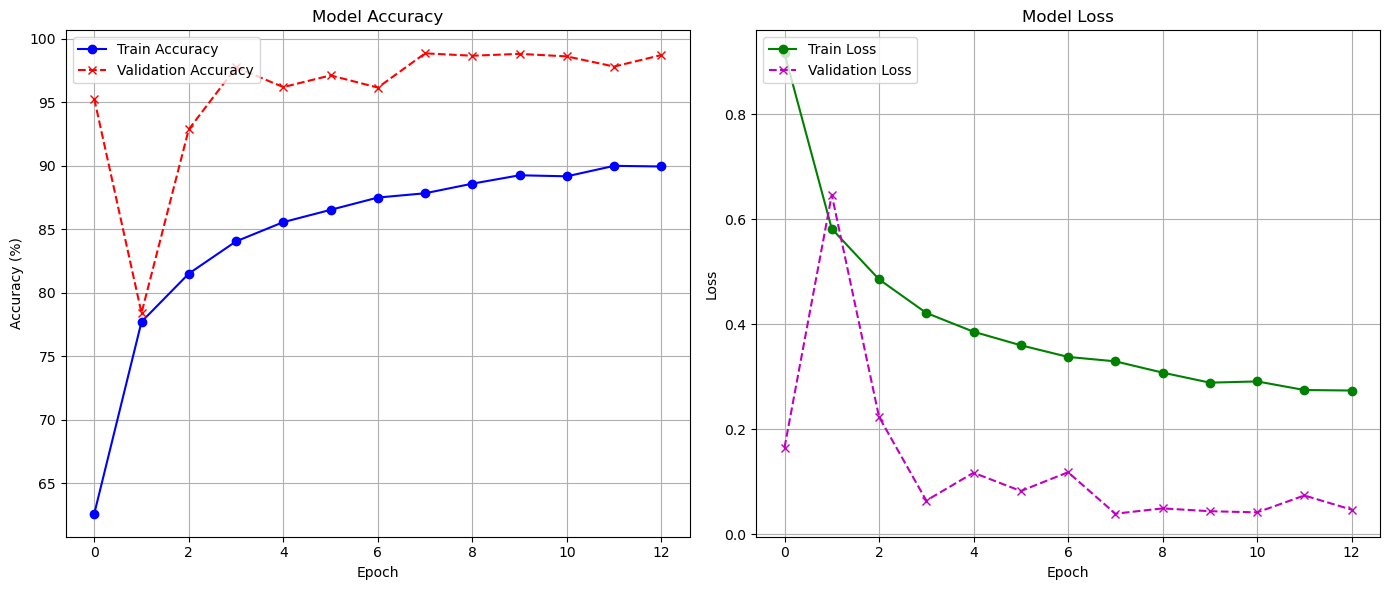

In [22]:
import matplotlib.pyplot as plt

# Convert train accuracy values to percentages
train_accuracy_percent = [acc * 100 for acc in train_accuracy]

# Plot training history
plt.figure(figsize=(14, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(train_accuracy_percent, label='Train Accuracy', linestyle='-', marker='o', color='b')
plt.plot(val_accuracy, label='Validation Accuracy', linestyle='--', marker='x', color='r')
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss', linestyle='-', marker='o', color='g')
plt.plot(val_loss, label='Validation Loss', linestyle='--', marker='x', color='m')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


<a id="8"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Evaluating Results </p>

In [24]:
def evaluate_model(model, dataloader, criterion):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation for inference
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the same device as the model

            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute the loss

            running_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            _, predicted = torch.max(outputs, 1)  # Get the predicted class
            total += labels.size(0)  # Accumulate the total number of samples
            correct += (predicted == labels).sum().item()  # Accumulate the number of correct predictions

    loss = running_loss / len(dataloader.dataset)  # Compute the average loss
    accuracy = 100 * correct / total  # Compute the accuracy as a percentage

    return loss, accuracy

# Evaluate the model on the test data
test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 0.0448

Test Accuracy: 98.80%
